In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# load data
train_data = pd.read_csv('/Users/evatoledano/ML 2/project/train.csv')

train_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,242642,2881,130,22,210,54,1020,250,221,88,...,0,0,0,0,0,0,0,0,0,1
1,309891,3005,351,14,242,-16,1371,194,215,159,...,0,0,0,0,0,0,0,0,0,1
2,287847,3226,63,14,618,2,1092,232,210,107,...,0,0,0,0,0,0,0,0,0,1
3,516307,3298,317,8,661,60,752,198,233,174,...,0,0,0,0,0,0,0,0,0,1
4,124860,3080,35,6,175,26,3705,219,227,144,...,0,0,0,0,0,0,0,0,0,1


In [3]:
train_data.shape

(15120, 56)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild


## infos pour nous

- Id : Un identifiant unique pour chaque observation. Ce n'est probablement pas utile pour la prédiction et peut être ignoré dans l'analyse.
Variables Physiques et Géographiques :
- Elevation : L'élévation du terrain (probablement en mètres ou en pieds).
- Aspect : Orientation azimutale du versant (en degrés).
- Slope : Pente du terrain (en degrés).
Horizontal_Distance_To_Hydrology : Distance horizontale à la source d'eau la plus proche.
- Vertical_Distance_To_Hydrology : Distance verticale à la source d'eau la plus proche.
- Horizontal_Distance_To_Roadways : Distance horizontale aux routes les plus proches.
- Hillshade_9am/Noon/3pm : Mesure de l'ombre à différents moments de la journée.
- Horizontal_Distance_To_Fire_Points : Distance horizontale aux points de feu (zones d'incendie) les plus proches.
Ces variables sont susceptibles d'être fortement corrélées avec le type de couverture forestière en raison de leur impact direct sur l'écologie locale.
- Variables de Zone Sauvage (Wilderness_Area1 à Wilderness_Area4) : Variables catégorielles (probablement codées en one-hot) indiquant dans quelle zone de nature sauvage se trouve l'observation. Elles peuvent être importantes car différentes zones peuvent avoir des caractéristiques écologiques distinctes.
- Variables de Type de Sol (Soil_Type1 à Soil_Type40) : Similaire aux zones sauvages, ces variables indiquent le type de sol et sont également catégorielles, probablement codées en one-hot. Le sol influence grandement la végétation et donc le type de couverture forestière.
- Cover_Type : Variable cible pour la classification, indiquant le type de couverture forestière.


In [5]:
train_data['Cover_Type'].describe()

count    15120.000000
mean         4.000000
std          2.000066
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          7.000000
Name: Cover_Type, dtype: float64

In [6]:
train_data.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,267008.526389,2748.649934,155.834524,16.556746,228.376521,51.311706,1717.977712,213.028836,218.865741,134.477116,...,0.043849,0.040939,0.001190,0.006812,0.000926,0.002116,0.049206,0.041931,0.030159,4.000000
std,179261.722330,419.009589,109.745372,8.534602,209.196381,61.520488,1330.263450,30.638406,22.797288,46.070054,...,0.204766,0.198156,0.034484,0.082257,0.030416,0.045957,0.216306,0.200439,0.171030,2.000066
min,5.000000,1877.000000,0.000000,0.000000,0.000000,-135.000000,0.000000,52.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,103705.000000,2373.000000,65.000000,10.000000,67.000000,5.000000,760.000000,197.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,276034.500000,2754.000000,125.000000,15.000000,180.000000,32.000000,1315.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,398150.250000,3109.000000,257.000000,22.000000,330.000000,80.000000,2292.000000,236.000000,235.000000,166.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,581005.000000,3850.000000,360.000000,50.000000,1376.000000,570.000000,6803.000000,254.000000,254.000000,251.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


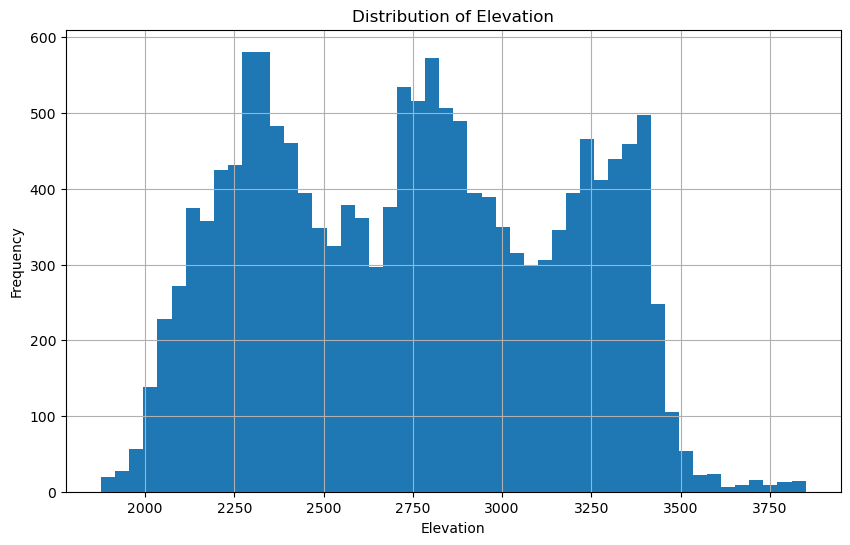

In [7]:
plt.figure(figsize=(10, 6))
train_data['Elevation'].hist(bins=50)
plt.title('Distribution of Elevation')
plt.xlabel('Elevation')
plt.ylabel('Frequency')
plt.show()

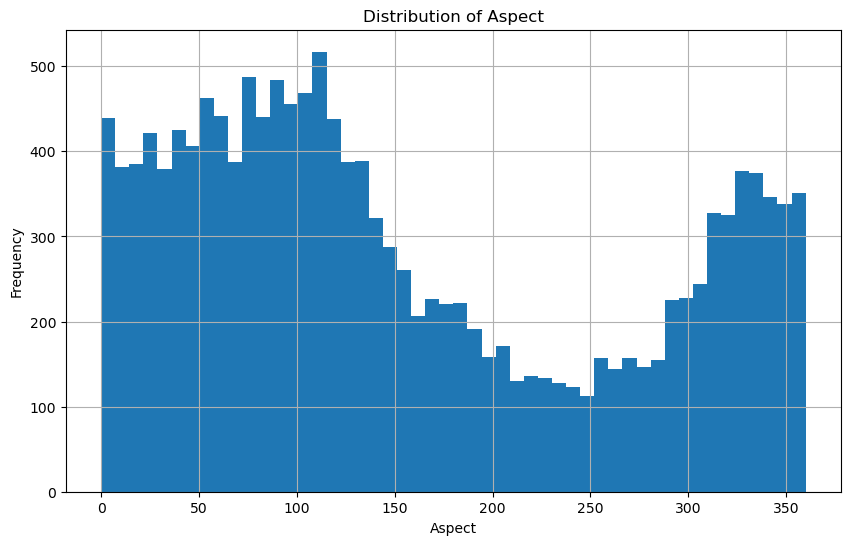

In [8]:
plt.figure(figsize=(10, 6))
train_data['Aspect'].hist(bins=50)
plt.title('Distribution of Aspect')
plt.xlabel('Aspect')
plt.ylabel('Frequency')
plt.show()

In [9]:
missing_values = train_data.isnull().sum()

print(missing_values)

# no missing values

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In a classification problem, such as predicting forest cover type, it is crucial to know whether the training data are balanced between the different classes: for the : Model Performance and Balancing Strategies

In [10]:
# check the balance class
# Cover_Type -> variable that we want to predict

train_data.Cover_Type.value_counts()

#-> everything is balanced

1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64

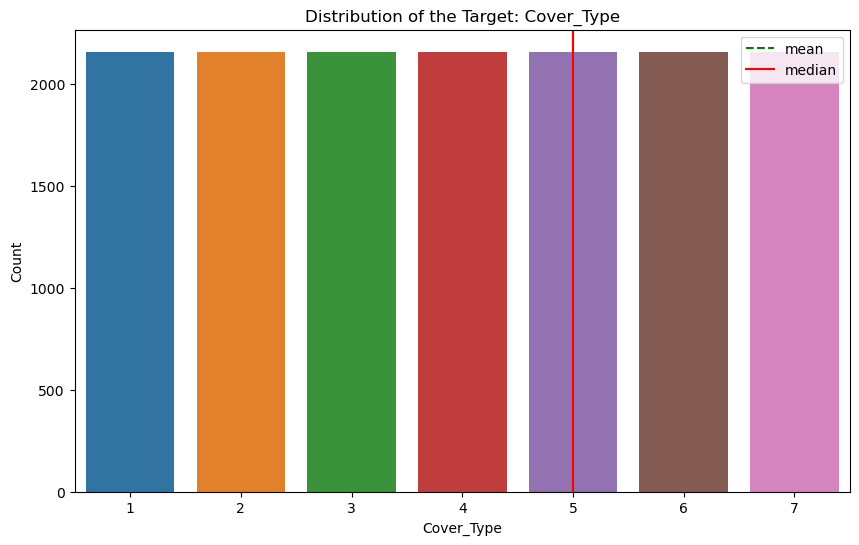

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Cover_Type', data=train_data)

mean_value = train_data['Cover_Type'].mean()
median_value = train_data['Cover_Type'].median()

plt.axvline(x=mean_value, color='g', linestyle='--', label='mean')
plt.axvline(x=median_value, color='r', linestyle='-', label='median')

plt.legend()
plt.title('Distribution of the Target: Cover_Type')
plt.xlabel('Cover_Type')
plt.ylabel('Count')

plt.show()

In [12]:
# Convert 'Cover_Type' to a numeric type if it represents numbers
train_data['Cover_Type'] = train_data['Cover_Type'].astype(int)

# Then you can plot the KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(data=train_data, x='Cover_Type', hue='Wilderness_Area', fill=True)

plt.title('Density of Cover Types Among Different Wilderness Areas')
plt.xlabel('Cover Type')
plt.ylabel('Density')

plt.show()


ValueError: Could not interpret value `Wilderness_Area` for parameter `hue`

<Figure size 1000x600 with 0 Axes>

## Infos pour nous

- Courbes colorées : Chaque couleur représente une zone de nature sauvage différente (1 à 4). L'aire sous chaque courbe indique la probabilité estimée de la densité de la couverture forestière pour chaque zone de nature sauvage.
- Pics des courbes : Les endroits où les courbes atteignent un pic indiquent la concentration la plus élevée de données pour un type de couverture forestière donné dans une zone de nature sauvage spécifique. Par exemple, un pic élevé pour la zone de nature sauvage 1 sur le type de couverture 2 indiquerait que ce type de couverture est particulièrement commun dans cette zone.


Le graphique permet d'observer les différences dans les distributions des types de couverture entre les différentes zones de nature sauvage. Par exemple, si une couleur a un pic très prononcé par rapport aux autres, cela indiquerait que le type de couverture correspondant est plus prévalent dans cette zone de nature sauvage particulière par rapport aux autres

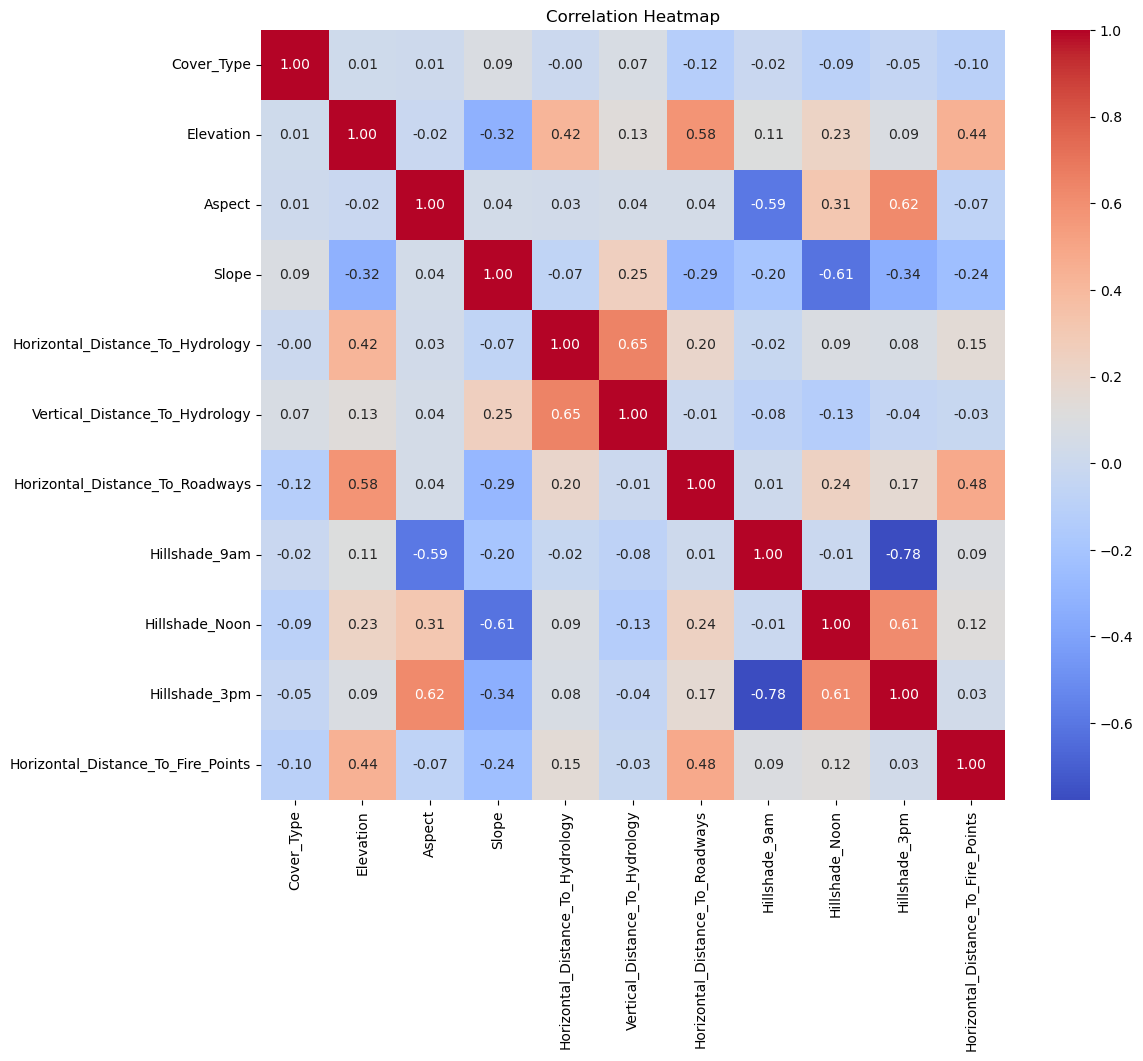

In [13]:
selected_columns = ['Cover_Type', 'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
                    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
                    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
                    'Horizontal_Distance_To_Fire_Points']
selected_data = train_data[selected_columns]

correlations = selected_data.corr()

plt.figure(figsize=(12, 10))  # Ajuster la taille selon vos besoins
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Une couleur rouge indique une corrélation positive, une couleur bleue indique une corrélation négative, et l'intensité de la couleur indique la force de la corrélation. Par exemple, une couleur rouge foncé indique une corrélation positive forte, tandis qu'une couleur bleue foncée indique une corrélation négative forte.
Valeurs de Corrélation: Les nombres à l'intérieur de chaque cellule montrent la valeur exacte du coefficient de corrélation, allant de -1 à 1. Un 1 signifie une corrélation positive parfaite, un -1 signifie une corrélation négative parfaite, et un 0 indique l'absence de corrélation.


Interprétation:

Des valeurs proches de 1 ou -1 indiquent que les variables sont fortement corrélées positivement ou négativement. Par exemple, Horizontal_Distance_To_Roadways et Elevation ont une corrélation de 0.58, ce qui suggère une corrélation positive modérément forte.
Des valeurs proches de 0 indiquent une faible ou aucune corrélation linéaire. Par exemple, Aspect et Cover_Type ont une corrélation de 0.01, indiquant une très faible corrélation linéaire.

In [14]:
correlations_target = train_data.corrwith(train_data['Cover_Type']).sort_values(ascending=False)
print(correlations_target)

Cover_Type                            1.000000
Soil_Type38                           0.254248
Soil_Type39                           0.234777
Soil_Type40                           0.199545
Soil_Type10                           0.140102
Wilderness_Area3                      0.137298
Soil_Type35                           0.090457
Slope                                 0.086536
Wilderness_Area4                      0.074817
Vertical_Distance_To_Hydrology        0.070615
Soil_Type37                           0.069080
Soil_Type17                           0.042376
Id                                    0.034812
Soil_Type5                            0.029799
Soil_Type13                           0.028677
Soil_Type14                           0.024875
Soil_Type36                           0.022832
Soil_Type1                            0.017423
Soil_Type16                           0.016646
Elevation                             0.014241
Soil_Type18                           0.014120
Soil_Type2   

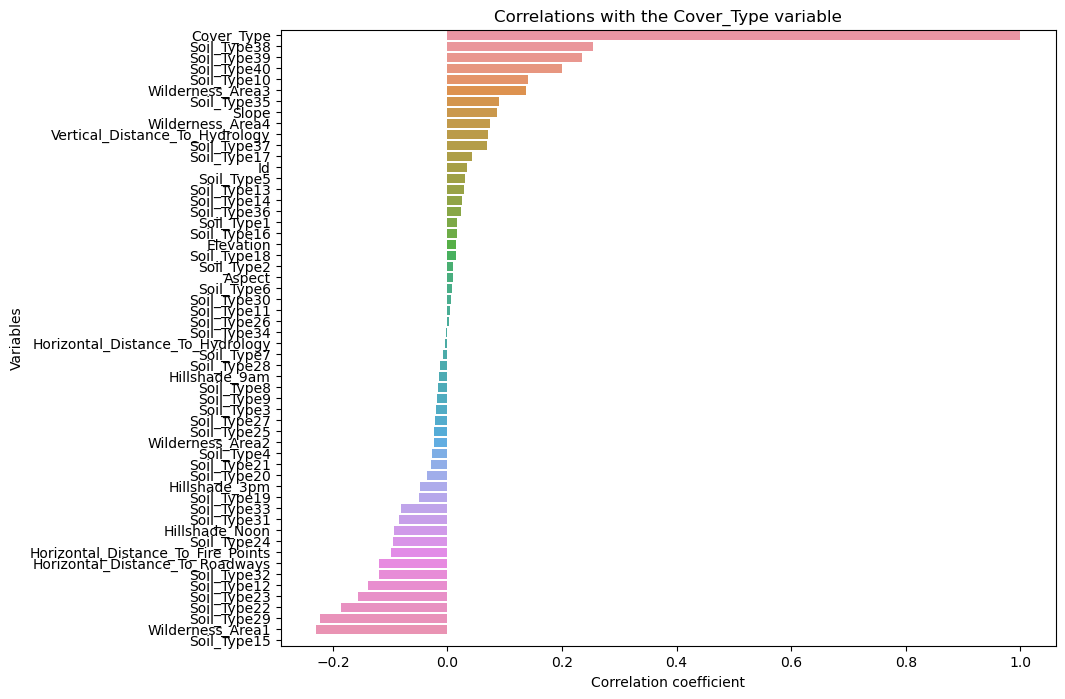

In [15]:
#Correlations with the Cover_Type variable


correlations_target = train_data.corrwith(train_data['Cover_Type']).sort_values(ascending=False)


plt.figure(figsize=(10, 8)) 
sns.barplot(x=correlations_target.values, y=correlations_target.index)


plt.title('Correlations with the Cover_Type variable')
plt.xlabel('Correlation coefficient')
plt.ylabel('Variables')
plt.show()

<Figure size 3000x2000 with 0 Axes>

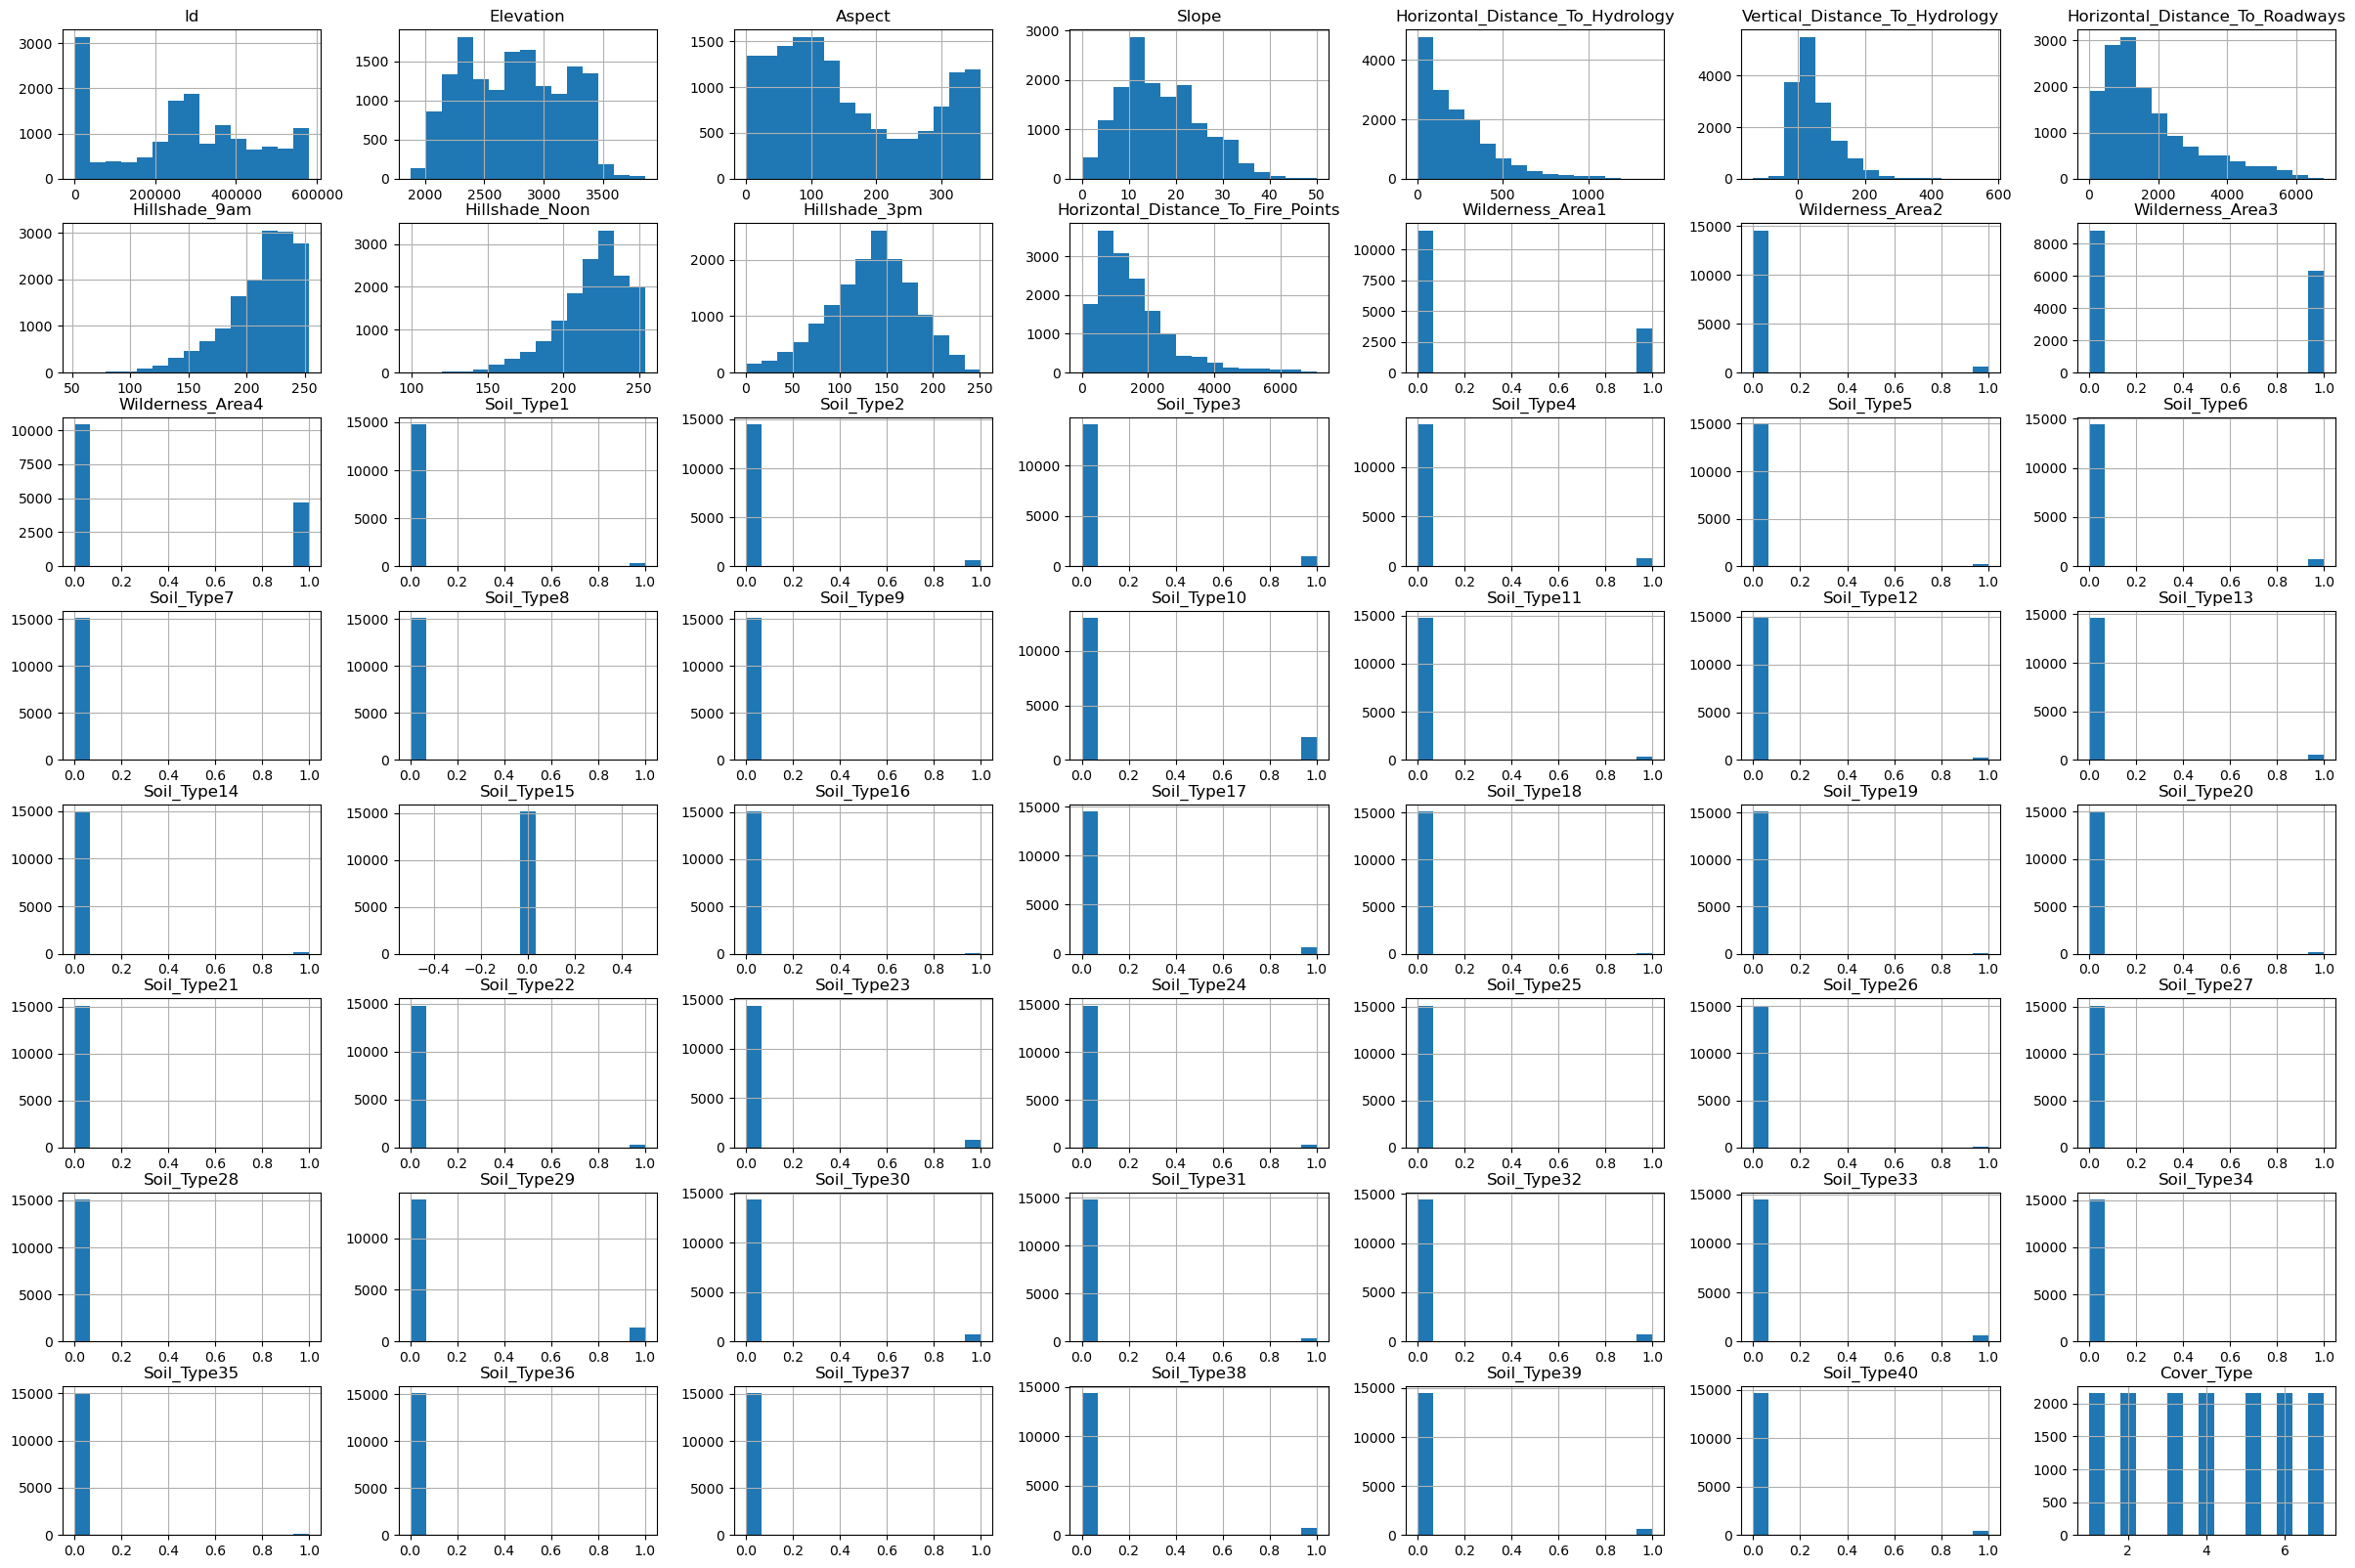

<Figure size 3000x2000 with 0 Axes>

In [16]:
#Visualization of the distribution of numerical variables

train_data.hist(bins=15, figsize=(30, 20), layout=(8, 7))

plt.figure(figsize=(30, 20))

/var/folders/0c/xx2cx7ns17s2__43rmj5_qnr0000gn/T/ipykernel_85722/4096042805.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[var], label=f'Cover Type {cover_type}', shade=True)
/var/folders/0c/xx2cx7ns17s2__43rmj5_qnr0000gn/T/ipykernel_85722/4096042805.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[var], label=f'Cover Type {cover_type}', shade=True)
/var/folders/0c/xx2cx7ns17s2__43rmj5_qnr0000gn/T/ipykernel_85722/4096042805.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[var], label=f'Cover Type {cover_type}', shade=True)
/var/folders/0c/xx2cx7ns17s2__43rmj5_qnr0000gn/T/ipykernel_85722

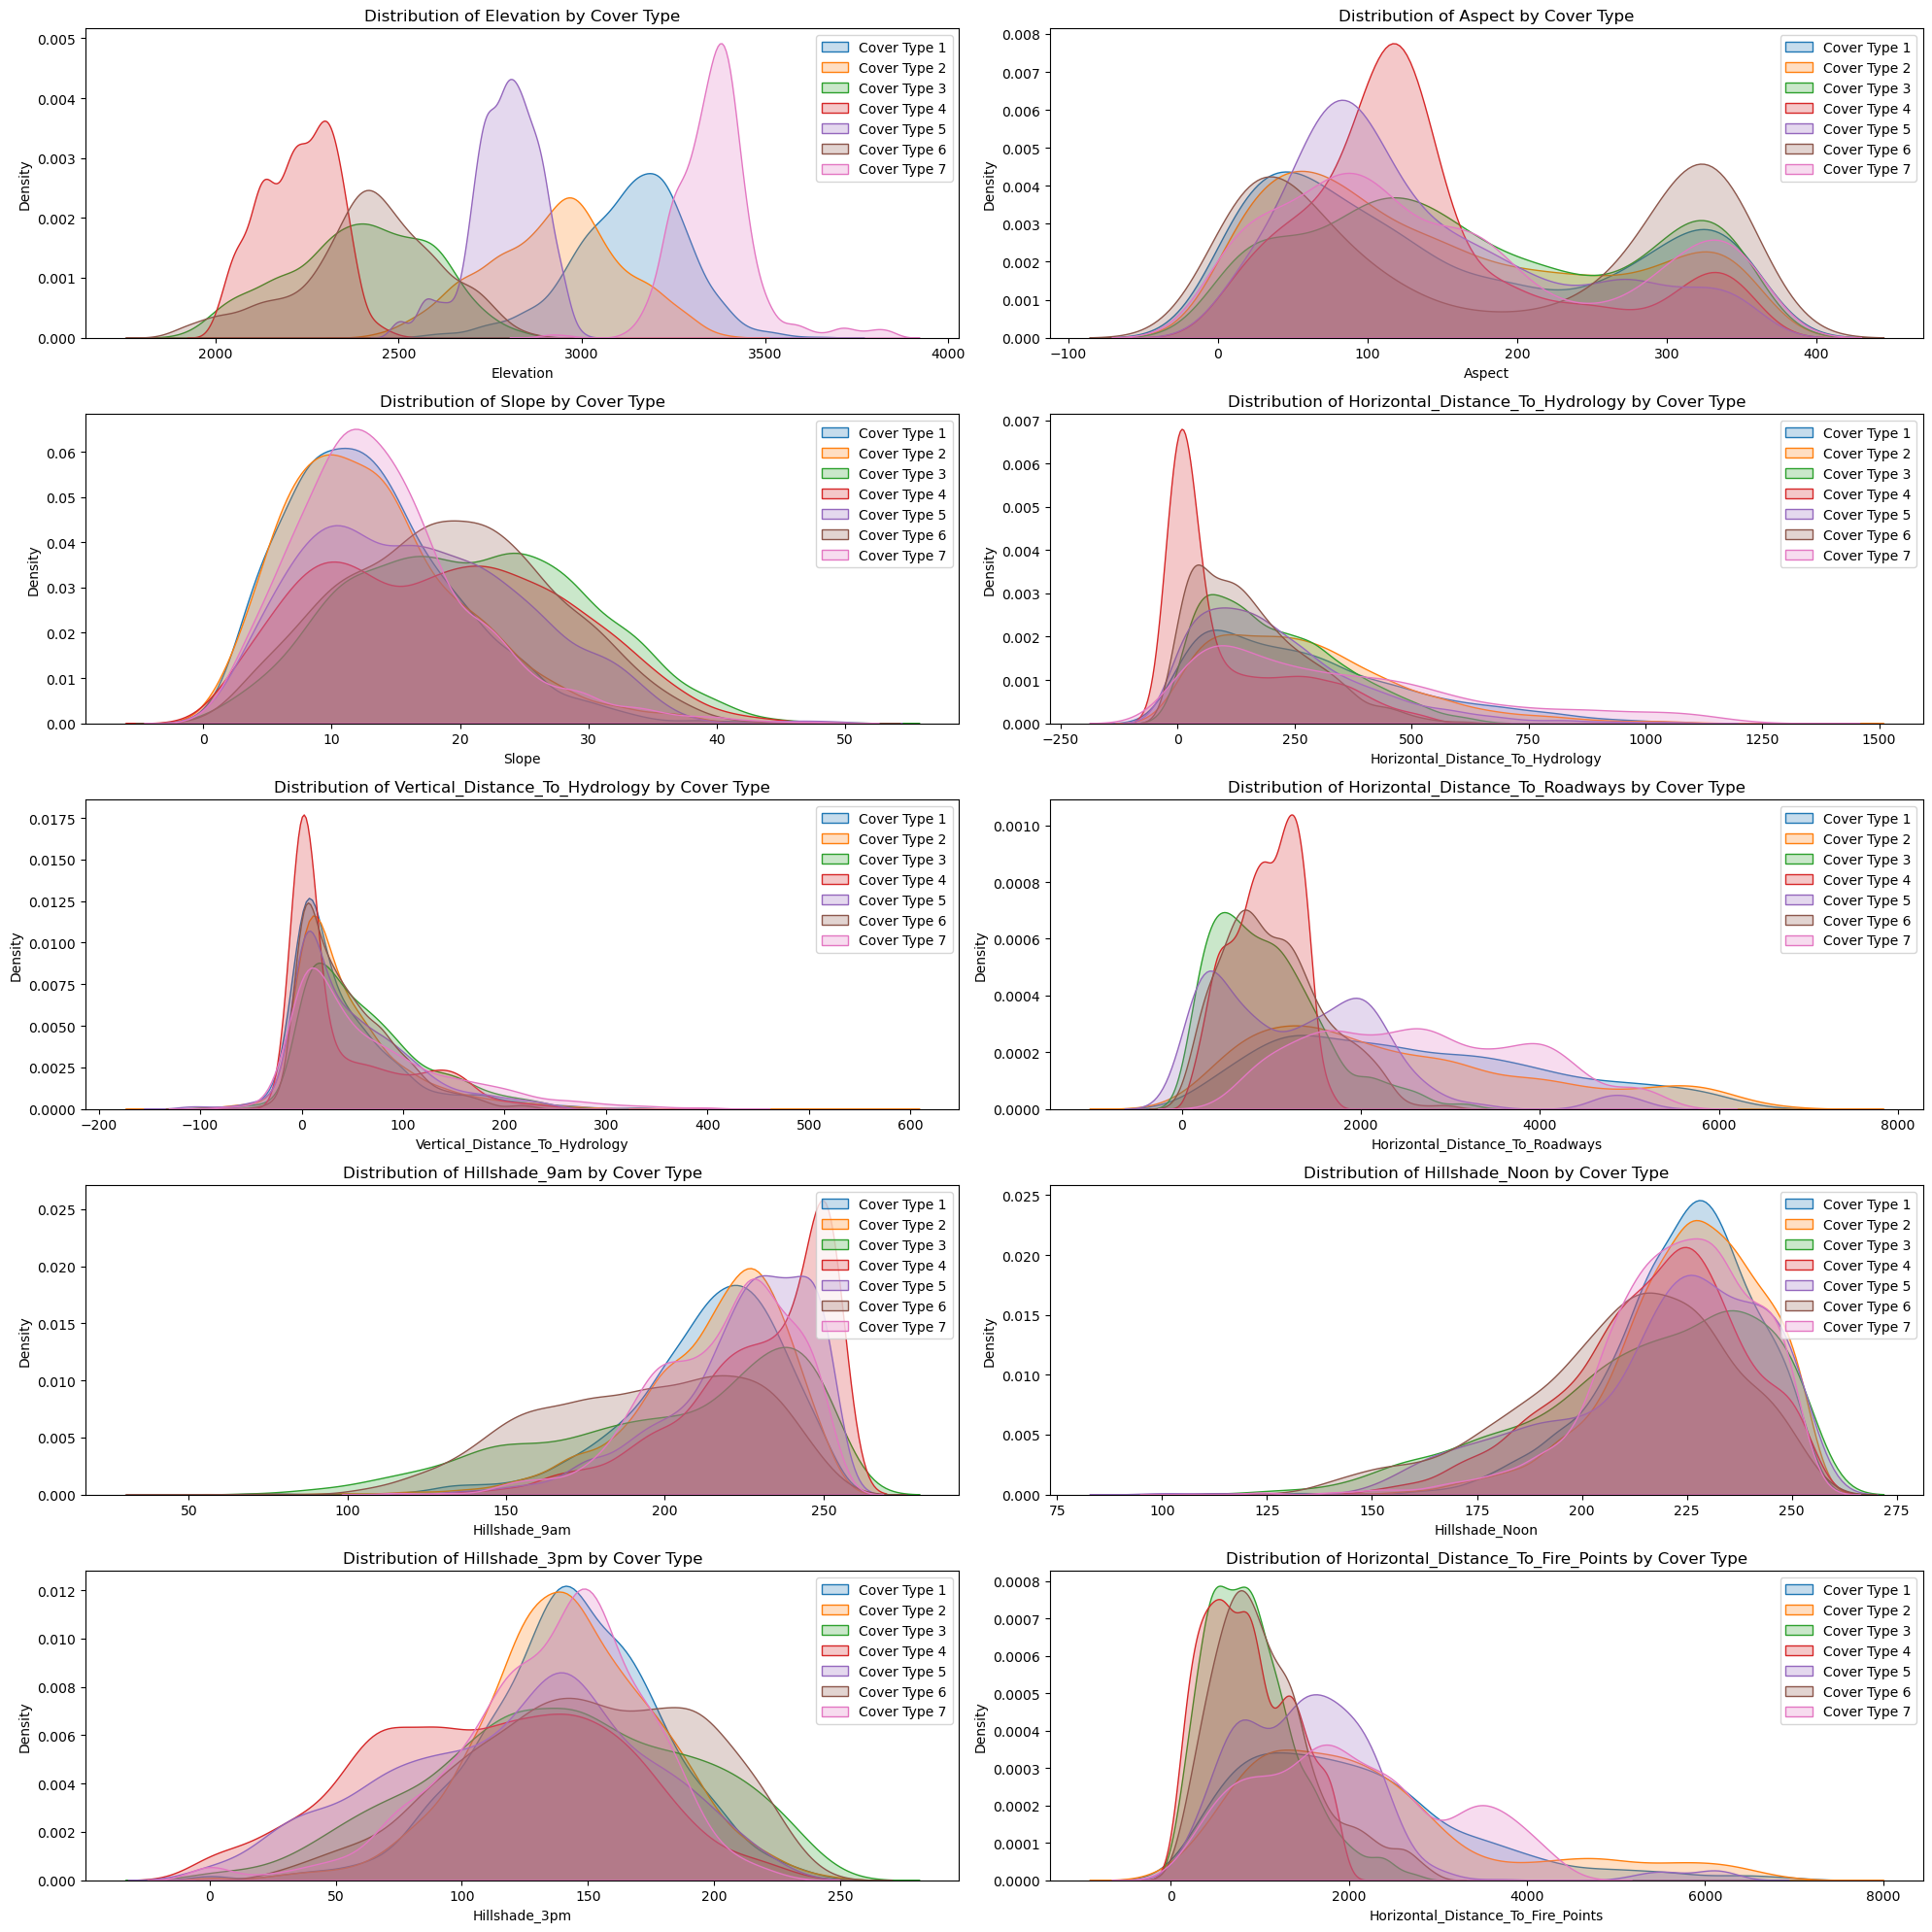

In [17]:
# correlations between Physical and geographical variables and covertypes

variables = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
             'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
             'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
             'Horizontal_Distance_To_Fire_Points']


plt.figure(figsize=(20, 20))

for i, var in enumerate(variables):
    plt.subplot(5, 2, i + 1)
    for cover_type in train_data['Cover_Type'].unique():
        subset = train_data[train_data['Cover_Type'] == cover_type]
        sns.kdeplot(subset[var], label=f'Cover Type {cover_type}', shade=True)
    plt.title(f'Distribution of {var} by Cover Type')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

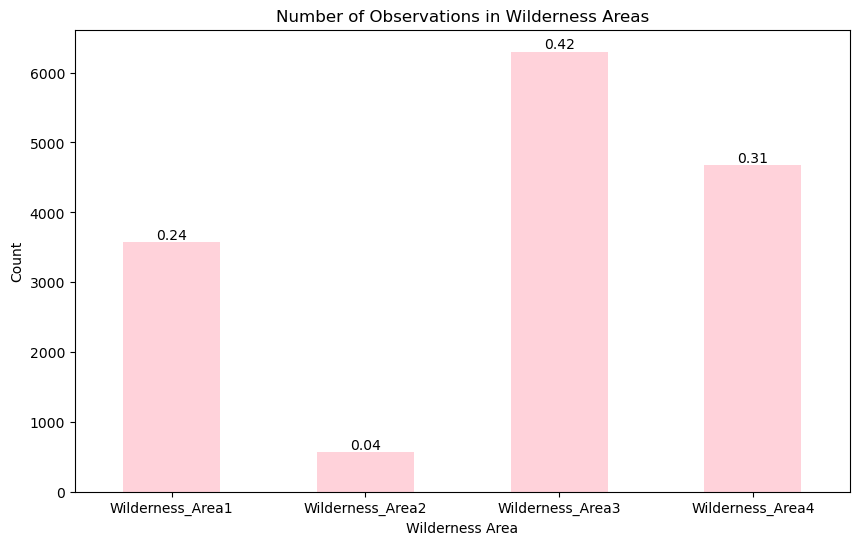

In [18]:
import pandas as pd
import matplotlib.pyplot as plt



wilderness_columns = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']


wilderness_counts = train_data[wilderness_columns].sum()


wilderness_ratios = wilderness_counts / len(train_data)


wilderness_df = pd.DataFrame({'Count': wilderness_counts, 'Ratio': wilderness_ratios})


ax = wilderness_df['Count'].plot(kind='bar', color='pink', figsize=(10, 6), alpha=0.7)


for i, ratio in enumerate(wilderness_df['Ratio']):
    ax.text(i, wilderness_df['Count'][i], f'{ratio:.2f}', ha='center', va='bottom')


plt.title('Number of Observations in Wilderness Areas')
plt.xlabel('Wilderness Area')
plt.ylabel('Count')
plt.xticks(rotation=0)  


plt.show()
##

## pour mieux comprendre

Graphique des Wilderness Areas

Le premier graphique montre le nombre d'observations (Count) pour chacune des quatre zones de nature sauvage dans le jeu de données. Les hauteurs des barres indiquent le nombre d'observations dans chaque zone. Les chiffres au-dessus des barres sont les ratios, qui représentent la proportion des observations dans chaque zone de nature sauvage par rapport au nombre total d'observations. Par exemple, si l'une des barres a un ratio de 0.24, cela signifie que 24% de toutes les observations du jeu de données se trouvent dans cette zone de nature sauvage particulière.

L'intérêt de ce graphique est de montrer comment les observations sont réparties parmi les différentes zones de nature sauvage, ce qui peut être pertinent car les caractéristiques écologiques peuvent varier considérablement d'une zone à l'autre et influencer le type de couverture forestière.

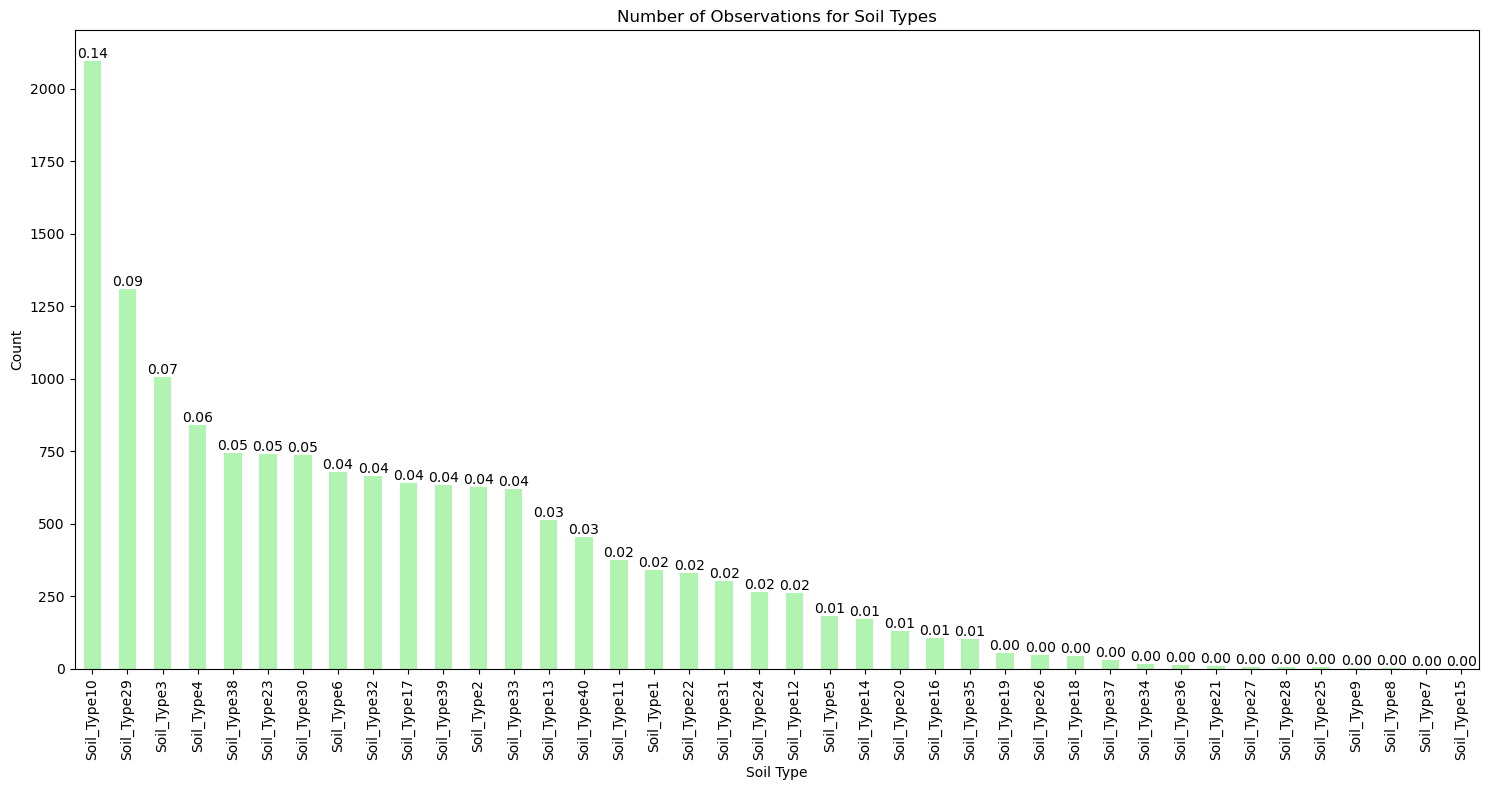

In [19]:
soil_type_columns = [f'Soil_Type{i}' for i in range(1, 41)]


soil_type_counts = train_data[soil_type_columns].sum()


soil_type_ratios = soil_type_counts / len(train_data)


soil_type_df = pd.DataFrame({'Count': soil_type_counts, 'Ratio': soil_type_ratios}).sort_values(by='Count', ascending=False)


ax = soil_type_df['Count'].plot(kind='bar', color='lightgreen', figsize=(15, 8), alpha=0.7)


for i, ratio in enumerate(soil_type_df['Ratio']):
    ax.text(i, soil_type_df['Count'][i], f'{ratio:.2f}', ha='center', va='bottom')


plt.title('Number of Observations for Soil Types')
plt.xlabel('Soil Type')
plt.ylabel('Count')
plt.xticks(rotation=90)  


plt.tight_layout()  
plt.show()

## Pour mieux comprendre

Graphique des Soil Types

Le deuxième graphique présente le nombre d'observations pour chaque type de sol. Comme pour le premier graphique, les hauteurs des barres indiquent le nombre d'observations et les chiffres annotés sont les ratios. Ces ratios montrent la fréquence relative de chaque type de sol dans le jeu de données.

Dans ce graphique, vous pouvez voir que certains types de sol sont beaucoup plus fréquents que d'autres. Par exemple, un type de sol avec un ratio de 0.14 est présent dans 14% des observations, ce qui le rend potentiellement très significatif pour la prédiction du type de couverture forestière. D'autres types de sol avec des ratios très faibles peuvent être moins importants ou plus rares dans la région étudiée.

Interprétation

L'interprétation de ces graphiques peut vous aider à comprendre l'importance relative de différentes caractéristiques écologiques et environnementales dans votre jeu de données. En connaissant la répartition des zones de nature sauvage et des types de sol, vous pouvez déduire des informations sur :

La diversité des zones de nature sauvage et des types de sol dans le jeu de données.
Les types de sol ou les zones de nature sauvage qui pourraient avoir une influence plus forte sur le type de couverture forestière en raison de leur prévalence.
Les types de sol ou les zones de nature sauvage qui pourraient nécessiter une attention particulière dans l'analyse en raison de leur rareté.
Ces informations peuvent être utilisées pour affiner vos modèles de machine learning, par exemple, en donnant plus de poids aux caractéristiques qui sont moins fréquentes mais potentiellement très informatives pour prédire le type de couverture forestière.

## Test data

In [20]:
# load data
test_data = pd.read_csv('/Users/evatoledano/ML 2/project/test-full.csv')

test_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,0
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,0
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,0
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,0
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,0


In [21]:
test_data.shape

(581012, 55)

In [22]:
test_data.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,290506.500000,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,...,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060
std,167723.861638,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,...,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791
min,1.000000,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,145253.750000,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,290506.500000,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,435759.250000,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,581012.000000,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# difference between test data et train data

In [23]:
print(train_data.shape)
print(test_data.shape)

(15120, 56)
(581012, 55)


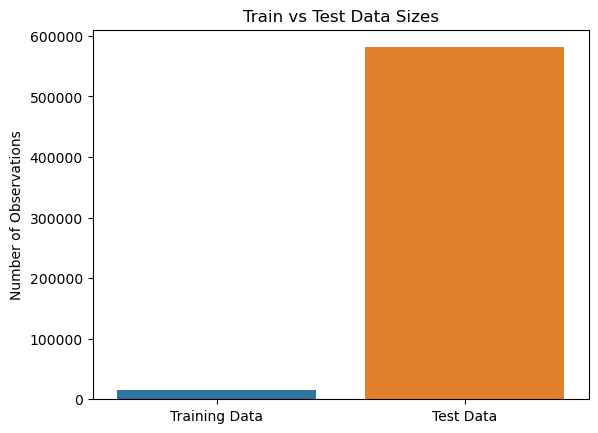

In [24]:
# Compare the number of observations in test versus train data
train_size = train_data.shape[0]  
test_size = test_data.shape[0]    

# Data to plot
sizes = [train_size, test_size]
labels = ['Training Data', 'Test Data']

sns.barplot(x=labels, y=sizes)
plt.title('Train vs Test Data Sizes')
plt.ylabel('Number of Observations')
plt.show()

**Data Exploration**

Our dataset is composed of 1 target variable and 54 features, both categorical and numerical:

Numerical features:
- **Elevation**, quantitative (meters): Elevation in meters
- **Aspect**, quantitative (azimuth): Aspect in degrees azimuth
- **Slope**, quantitative (degrees): Slope in degrees
- **Horizontal_Distance_To_Hydrology**, quantitative (meters): Horz Dist to nearest surface water features
- **Vertical_Distance_To_Hydrology**, quantitative (meters): Vert Dist to nearest surface water features
- **Horizontal_Distance_To_Roadways**, quantitative (meters ): Horz Dist to nearest roadway
- **Hillshade_9am**, quantitative (0 to 255 index): Hillshade index at 9am, summer solstice
- **Hillshade_Noon**, quantitative (0 to 255 index): Hillshade index at noon, summer soltice
- **Hillshade_3pm**, quantitative (0 to 255 index): Hillshade index at 3pm, summer solstice
- **Horizontal_Distance_To_Fire_Points**, quantitative (meters): Horz Dist to nearest wildfire ignition points

Categorical features:
- **Wilderness_Area** (4 binary columns), qualitative (0 (absence) or 1 (presence)): Wilderness area designation
- **Soil_Type** (40 binary columns), qualitative (0 (absence) or 1 (presence)): Soil Type designation

Target:
- **Cover_Type** (7 types), integer (1 to 7): Forest Cover Type designation <br><br><br>



The target variable (cover_type) is categorical and includes 7 possibilities:
1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz <br><br><br>

There are no missing values, and all the values types are integers so no additional pre-processing is required at this stage.

**Check Anomalies & Outliers**

In [ ]:
train_data['Vertical_Distance_To_Hydrology']

We notice that there are negative values in the Vertical_Distance_To_Hydrology column, which may seem strange at first, but on reflection the negative values could indicate that the nearest surface water is either below this data point or below sea level. 

So, this values make sense, and we can keep it. 

In [25]:
def detect_outliers(df, n, features):
   
    outlier_indices = []

    for col in features:
       
        Q1 = df[col].quantile(0.25)
        
        Q3 = df[col].quantile(0.75)
        
        IQR = Q3 - Q1

        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = pd.Series(outlier_indices).value_counts()
    multiple_outliers = outlier_indices[outlier_indices > n].index

    return multiple_outliers


In [26]:
numeric_features = [
    'Elevation', 
    'Aspect', 
    'Slope', 
    'Horizontal_Distance_To_Hydrology', 
    'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 
    'Hillshade_Noon', 
    'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]
outliers_to_remove = detect_outliers(train_data, 2, numeric_features)

In [ ]:
print(outliers_to_remove)

In [27]:
train_data = train_data.drop(outliers_to_remove)

In [ ]:
train_data.shape

# Feature engeniring 

In [28]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

def scale_numerical_columns(df):
    
    df_scaled = df.copy()
    
    # List of columns not to be normalized
    non_scaled_columns = ['Id', 'Cover_Type'] + [f'Soil_Type{i}' for i in range(1, 41)] + [f'Wilderness_Area{i}' for i in range(1, 5)]
    
    # List of columns to be normalized
    scaled_columns = [col for col in df_scaled.columns if col not in non_scaled_columns]
    
 
    scaler = StandardScaler()
    
    df_scaled[scaled_columns] = scaler.fit_transform(df_scaled[scaled_columns])
    
    return df_scaled




#### Create Wilderness Density Feature

In [29]:
# First, we create a DataFrame to hold the counts of each cover type within each wilderness area
wilderness_cover_counts = train_data.groupby('Cover_Type').agg({
    'Wilderness_Area1': 'sum',
    'Wilderness_Area2': 'sum',
    'Wilderness_Area3': 'sum',
    'Wilderness_Area4': 'sum'
}).reset_index()

# Now, we calculate the density for each cover type within each wilderness area
total_counts = train_data[['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']].sum()
wilderness_cover_density = wilderness_cover_counts.set_index('Cover_Type').div(total_counts)

# Function to apply the density-based feature to each row
def apply_density_feature(row):
    cover_type = row['Cover_Type']
    for i in range(1, 5):
        wilderness_area = f'Wilderness_Area{i}'
        if row[wilderness_area] == 1:  # If the observation is in wilderness area i
            return wilderness_cover_density.loc[cover_type, wilderness_area]

# Apply the function to create the new density-based feature
train_data['Cover_Type_Density'] = train_data.apply(apply_density_feature, axis=1)

### Create euclidian distance features

In [30]:
# Calculate new features based on mean distances
train_data['Mean_Elevation_Vertical_Distance_Hydrology'] = (train_data['Elevation'] + train_data['Vertical_Distance_To_Hydrology']) / 2
train_data['Mean_Distance_Hydrology_Firepoints'] = (train_data['Horizontal_Distance_To_Hydrology'] + train_data['Horizontal_Distance_To_Fire_Points']) / 2
train_data['Mean_Distance_Hydrology_Roadways'] = (train_data['Horizontal_Distance_To_Hydrology'] + train_data['Horizontal_Distance_To_Roadways']) / 2
train_data['Mean_Distance_Firepoints_Roadways'] = (train_data['Horizontal_Distance_To_Fire_Points'] + train_data['Horizontal_Distance_To_Roadways']) / 2

print(f"Shape of the dataset after adding new features: {train_data.shape}")

Shape of the dataset after adding new features: (15003, 61)


### Remove low correlation coefficients

In [31]:
import pandas as pd
import numpy as np

# Assuming 'train' is your DataFrame and includes both features and the target variable 'Cover_Type'
correlation_matrix = train_data.corr()  # Compute the correlation matrix

# Calculate the correlation of each feature with 'Cover_Type'
feature_correlation = correlation_matrix['Cover_Type'].drop('Cover_Type')  # Exclude self-correlation

# Decide on a threshold for low correlation (example: below 0.02 in absolute value)
low_correlation_features = feature_correlation[abs(feature_correlation) < 0.005].index.tolist()

# Drop these low correlation features from your dataset
train = train_data.drop(low_correlation_features, axis=1)

print(f"Removed features with low correlation to 'Cover_Type': {low_correlation_features}")
print(f"Shape of the dataset before removal: {train.shape}")
print(f"Shape of the dataset after removal: {train.shape}")
# BUGG ça affiche la même taille


Removed features with low correlation to 'Cover_Type': ['Elevation', 'Soil_Type26', 'Soil_Type34']
Shape of the dataset before removal: (15003, 58)
Shape of the dataset after removal: (15003, 58)


### Merging Soil Types

In [32]:
# Extract soil type columns
soil_columns = [col for col in train.columns if col.startswith('Soil_Type')]
# Combine the soil type columns into a single feature by identifying the active soil type
train['Soil_Type_Combined'] = train[soil_columns].idxmax(axis=1).str.extract('(\d+)').astype(int)

# Drop the original soil type columns
train = train.drop(soil_columns, axis=1)

# test model

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Prepare the data
X = train.drop(['Id', 'Cover_Type'], axis=1)
y = train['Cover_Type']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_pred = rf_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.9980006664445185

In [34]:

# test model


from ast import literal_eval
from catboost import CatBoostClassifier
#from lightgbm import LGBMClassifier
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score



def evaluate_models(X, y):
    models = {
        "LogReg": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "SVM": SVC(),
        "DT": DecisionTreeClassifier(),
        "RF": RandomForestClassifier(),
        "ExtraTrees": ExtraTreesClassifier(),
        "XGB": XGBClassifier(),
        "Catboost": CatBoostClassifier(verbose=0),
        #"LightGBM": LGBMClassifier(),
    }
    
    results = {}
    
    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=5, scoring='accuracy') 
        results[name] = scores
        print(f"{name}: Accuracy = {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")
    
    return results

In [35]:
y_train = y_train-1
print(evaluate_models(X_train,y_train))

/Users/evatoledano/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/evatoledano/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

LogReg: Accuracy = 0.4796 (+/- 0.0227)
KNN: Accuracy = nan (+/- nan)
SVM: Accuracy = 0.5912 (+/- 0.0076)
DT: Accuracy = 0.9990 (+/- 0.0008)
RF: Accuracy = 0.9983 (+/- 0.0020)
ExtraTrees: Accuracy = 0.9996 (+/- 0.0005)
XGB: Accuracy = 0.9999 (+/- 0.0003)
Catboost: Accuracy = 0.9999 (+/- 0.0003)
{'LogReg': array([0.50062474, 0.47063723, 0.46916667, 0.48125   , 0.47625   ]), 'KNN': array([nan, nan, nan, nan, nan]), 'SVM': array([0.59641816, 0.59142024, 0.59375   , 0.58916667, 0.58541667]), 'DT': array([0.99916701, 0.99958351, 0.99875   , 0.99916667, 0.99833333]), 'RF': array([0.99625156, 0.99875052, 0.99875   , 0.99875   , 0.99875   ]), 'ExtraTrees': array([0.99958351, 0.99958351, 0.99958333, 1.        , 0.99916667]), 'XGB': array([1.        , 0.99958351, 1.        , 1.        , 1.        ]), 'Catboost': array([1.        , 1.        , 1.        , 0.99958333, 1.        ])}


**Prediction** A VOIR !!!!!